# The Battle of Neighborhoods - New Delhi

<p>Being the greatest HubSpot of some of the most exquisite cuisines and lip-smacking local food from every corner of the world, New Delhi, the national capital of India, is proud to have some of the most unique and best restaurants within its lap. Any cuisine, Indian or International, name it and they have it.</p>
<p>In this project, we will explore the neighbourhood of New Delhi city and find out the best restaurants for certain cuisines.</p>

<h3>Importing necessary libraries</h3>

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                       

<h3>Reading the dataset</h3>

This dataset contains locality, restaurants, cuisines, ratings of the restaurants around the world along with their latitude and longitude. We extract the data of New Delhi using the latitude and longitudes provided. 

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_9954b7fa54ad44c0a953ec5d2c8bc5cc = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Fyh8nFl3QJwqiOUh2YimlRmB-bfeVNR-I3f9FEEODLxY',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_9954b7fa54ad44c0a953ec5d2c8bc5cc.get_object(Bucket='thebattleofneighborhoods-donotdelete-pr-s6evgbonto9cwi',Key='zomato.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body, encoding = 'ISO-8859-1')
df.head()


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591  
2   Very Good    270  
3   Excellent    365  
4   Excellent    229

<h3>Data Extraction</h3>

In [3]:
df_IN = df[df['Country Code'] == 1]
df_ND = df_IN[df_IN['City'] == 'New Delhi']
df_ND.reset_index(drop = True, inplace = True)
df_ND.head()

Restaurant ID  Restaurant Name  Country Code       City  \
0       18287358       Food Cloud             1  New Delhi   
1       18216944        Burger.in             1  New Delhi   
2         313333  Days of the Raj             1  New Delhi   
3       18384127   Dilli Ka Dhaba             1  New Delhi   
4            582        Govardhan             1  New Delhi   

                                             Address    Locality  \
0                              Aaya Nagar, New Delhi  Aaya Nagar   
1        84, Near Honda Showroom, Adchini, New Delhi     Adchini   
2  81/3, 1st Floor, Qutub Residency, Adchini, New...     Adchini   
3  66 A, Ground Floor, Sri Aurobindo Marg, Adchin...     Adchini   
4  84, Adjacent Hero Motor Bike Showroom, Main Me...     Adchini   

        Locality Verbose  Longitude   Latitude  \
0  Aaya Nagar, New Delhi   0.000000   0.000000   
1     Adchini, New Delhi  77.196923  28.535382   
2     Adchini, New Delhi  77.197475  28.535493   
3     Adchini, New Delhi  77.198033  28.537547   
4     Adchini, New Delhi  77.196924  28.535523   

                              Cuisines  Average Cost for two  \
0                       Cuisine Varies                   500   
1                            Fast Food                   350   
2   North Indian, Seafood, Continental                  1500   
3           South Indian, North Indian                   500   
4  South Indian, North Indian, Chinese                   500   

             Currency Has Table booking Has Online delivery Is delivering now  \
0  Indian Rupees(Rs.)                No                  No                No   
1  Indian Rupees(Rs.)                No                 Yes                No   
2  Indian Rupees(Rs.)               Yes                 Yes                No   
3  Indian Rupees(Rs.)                No                  No                No   
4  Indian Rupees(Rs.)                No                 Yes                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            2               0.0        White   
1                   No            1               3.2       Orange   
2                   No            3               3.4       Orange   
3                   No            2               2.6       Orange   
4                   No            2               3.4       Orange   

  Rating text  Votes  
0   Not rated      2  
1     Average     46  
2     Average     45  
3     Average     11  
4     Average    238

In [4]:
df_ND.shape

(5473, 21)

<h3>Cleaning the dataset</h3>

In [5]:
data = df_ND[df_ND.Longitude != 0.000000][['Restaurant Name', 'Locality', 'Longitude', 'Latitude', 'Cuisines', 'Aggregate rating', 'Rating text', 'Votes']]

In [6]:
data = data[data['Aggregate rating'] != 0.0]
data.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  
1                            Fast Food               3.2     Average     46  
2   North Indian, Seafood, Continental               3.4     Average     45  
3           South Indian, North Indian               2.6     Average     11  
4  South Indian, North Indian, Chinese               3.4     Average    238  
5                              Mughlai               3.1     Average      8

<h3>Using geopy to get latitude and longitude</h3>

In [7]:
address = 'New Delhi, ND'

geolocator = Nominatim(user_agent="nd_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 28.6141793, 77.2022662.


<h3>Creating a map to show restaurant clusters</h3

In [8]:
# create map of New Delhi using latitude and longitude values
ndr = folium.Map(location=[latitude, longitude], zoom_start=10)

X = data['Latitude']
Y = data['Longitude']
Z = np.stack((X, Y), axis=1)

kmeans = KMeans(n_clusters = 5).fit(Z)

clusters = kmeans.labels_
colors = ['red', 'green', 'blue', 'yellow','orange']
data['Cluster'] = clusters

# add markers to map
for lat, lng, loc, clu in zip(data['Latitude'], data['Longitude'], data['Locality'], data['Cluster']):
    label = folium.Popup(loc, parse_html = True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[clu],
        fill_opacity=0.7).add_to(ndr)  
    
ndr

In [9]:
data.head()

Restaurant Name Locality  Longitude   Latitude  \
1        Burger.in  Adchini  77.196923  28.535382   
2  Days of the Raj  Adchini  77.197475  28.535493   
3   Dilli Ka Dhaba  Adchini  77.198033  28.537547   
4        Govardhan  Adchini  77.196924  28.535523   
5   Mezbaan Grills  Adchini  77.198122  28.538134   

                              Cuisines  Aggregate rating Rating text  Votes  \
1                            Fast Food               3.2     Average     46   
2   North Indian, Seafood, Continental               3.4     Average     45   
3           South Indian, North Indian               2.6     Average     11   
4  South Indian, North Indian, Chinese               3.4     Average    238   
5                              Mughlai               3.1     Average      8   

   Cluster  
1        4  
2        4  
3        4  
4        4  
5        4

<h3>Exploring the best restaurants in New Delhi based on Aggregate Rating</h3>

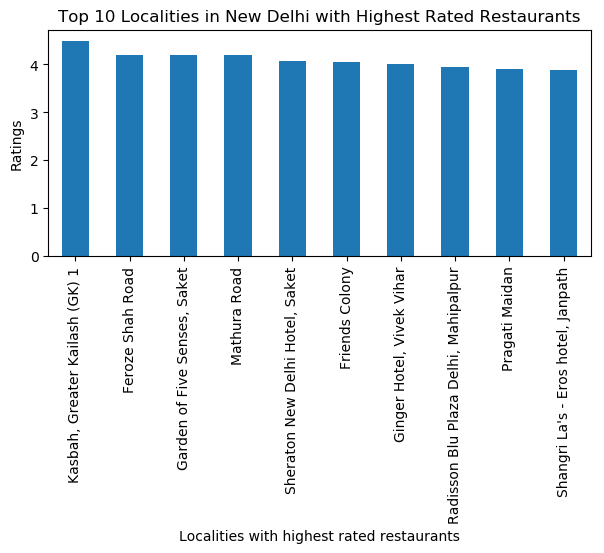

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Rated Restaurants')
plt.xlabel('Localities with highest rated restaurants')
plt.ylabel('Ratings')
plt.show()

So, the best restaurants can be found at Kashbah, Greater Kailash 1.

<h3>Exploring places with highest number of restaurants</h3>

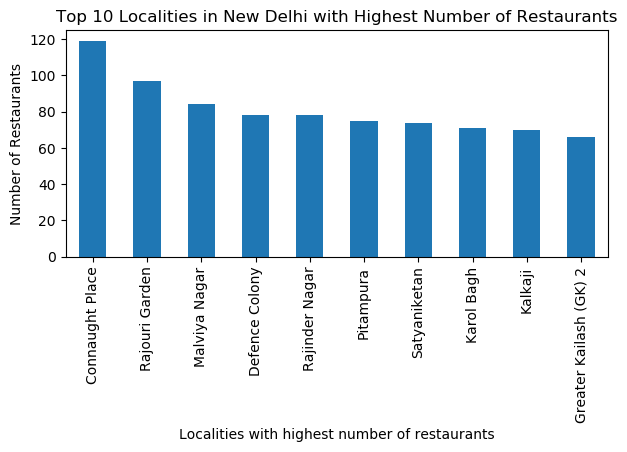

In [11]:
plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Number of Restaurants')
plt.xlabel('Localities with highest number of restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

Connaught Place has highest number of restaurants in New Delhi.

<h3>Exploring places with less number of restaurants</h3>

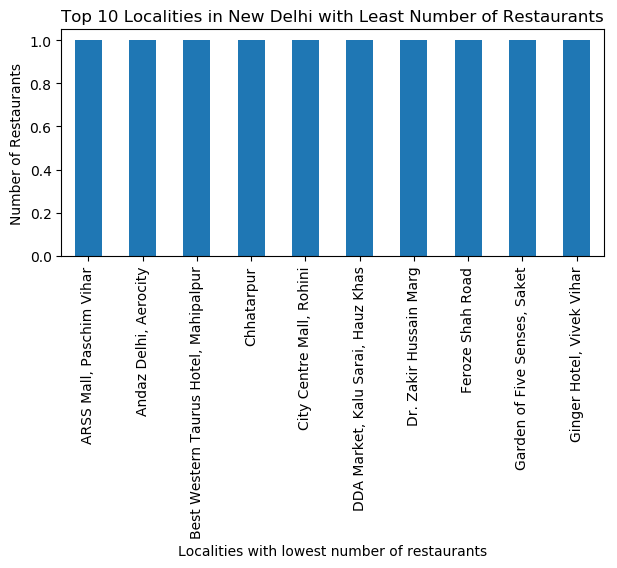

In [12]:
plt.figure(figsize=(7,3), dpi = 100)
data.groupby('Locality')['Restaurant Name'].count().nsmallest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Least Number of Restaurants')
plt.xlabel('Localities with lowest number of restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

ARSS Mall has least number of restaurants.

<h3>Exploring places with a lot of Chinese Restaurants</h3>

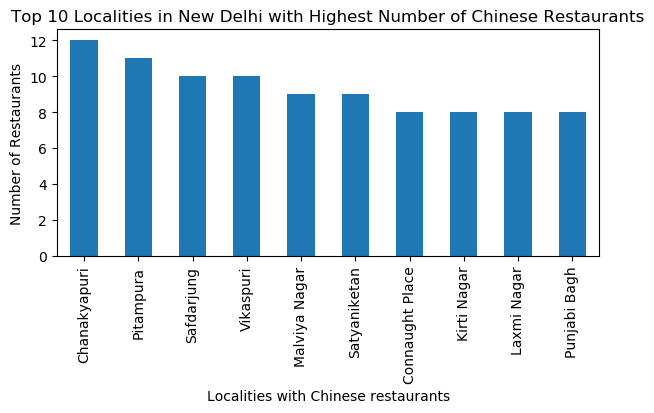

In [13]:
plt.figure(figsize=(7,3), dpi = 100)
data[data['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Restaurant Name'].count().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Number of Chinese Restaurants')
plt.xlabel('Localities with Chinese restaurants')
plt.ylabel('Number of Restaurants')
plt.show()

Chanakyapuri has highest number of Chinese Restaurants.

<h3>Exploring Localities with Highest Rated Chinese Restaurants</h3>

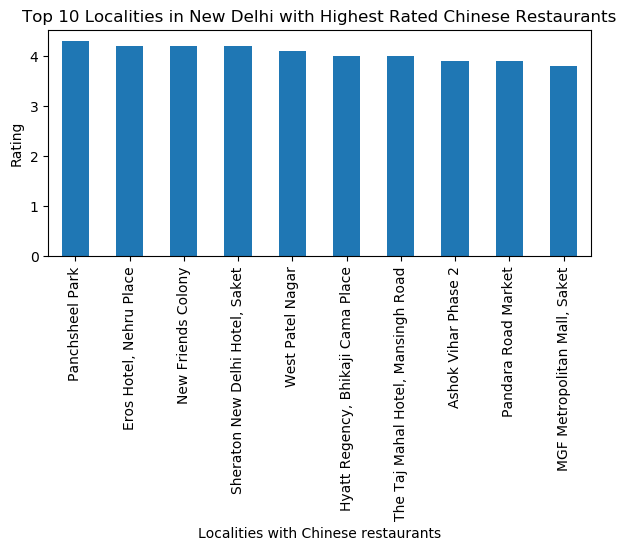

In [14]:
plt.figure(figsize=(7,3), dpi = 100)
data[data['Cuisines'].str.startswith('Chinese')].groupby('Locality')['Aggregate rating'].mean().nlargest(10).plot(kind='bar')
plt.title('Top 10 Localities in New Delhi with Highest Rated Chinese Restaurants')
plt.xlabel('Localities with Chinese restaurants')
plt.ylabel('Rating')
plt.show()

Panchsheel Park has best restaurants for Chinese cuisines.

<h3>Data Transformation</h3>

In [15]:
data_Loc =  data.groupby('Locality').count()['Restaurant Name'].to_frame()
data_rating= data.groupby('Locality')['Aggregate rating'].mean().to_frame()
data_Cuisines = data.groupby(['Locality'])['Cuisines'].agg(', '.join).reset_index()
data_R = data.groupby(['Locality'])['Rating text'].unique().agg(', '.join).reset_index()
data_V = data.groupby(['Locality'])['Votes'].sum().to_frame()
data_Lat = data.groupby('Locality').mean()['Latitude'].to_frame()
data_Lng = data.groupby('Locality').mean()['Longitude'].to_frame()
df_final = pd.merge(data_Lat, data_Lng, on = 'Locality').merge(data_Loc, on = 'Locality').merge(data_Cuisines, on = 'Locality').merge(data_rating, on = 'Locality').merge(data_R, on = 'Locality').merge(data_V, on = 'Locality')

In [16]:
df_final = df_final[df_final['Aggregate rating'] != 0.000000]
df_final.columns =['Locality','Lat','Lng', 'No_of_Restaurant','Cuisines', 'Agg_Rating','Comments' ,'No_of_Votes']
df_final.head()

Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                            Cuisines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  
0                         Average          117  
1  Average, Good, Poor, Very Good         1560  
2                   Average, Good          434  
3                         Average           59  
4                         Average          126

In [17]:
df_final.shape

(240, 8)

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

<h3>Defining Foursquare API Credentials</h3>

In [18]:
CLIENT_ID = 'AARASHA0JFXVPJ10TXSRGGO3MM1FWT5ELJWTVSBPXIH0GPBA' # your Foursquare ID
CLIENT_SECRET = 'FNHZWDFJJZCYZD30XOQVXHMKUB4GVNESGP5VL2W00W0Q4RPL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: AARASHA0JFXVPJ10TXSRGGO3MM1FWT5ELJWTVSBPXIH0GPBA
CLIENT_SECRET:FNHZWDFJJZCYZD30XOQVXHMKUB4GVNESGP5VL2W00W0Q4RPL


Lets explore the neighborhoods of New Delhi and find the top 100 venues within a radius of 500 meters.

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Locality', 
                  'Locality Latitude', 
                  'Locality Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [20]:
# find the venues in all New Delhi Locality
ND_venues = getNearbyVenues(names = df_final['Locality'], latitudes = df_final['Lat'], longitudes=df_final['Lng'])

ARSS Mall, Paschim Vihar
Adchini
Aditya Mega Mall, Karkardooma
Aerocity
Aggarwal City Mall, Pitampura
Aggarwal City Plaza, Rohini
Alaknanda
Ambience Mall, Vasant Kunj
Anand Lok
Anand Vihar
Andaz Delhi, Aerocity
Ansal Plaza Mall, Khel Gaon Marg
Asaf Ali Road
Ashok Vihar Phase 1
Ashok Vihar Phase 2
Ashok Vihar Phase 3
Barakhamba Road
Basant Lok Market, Vasant Vihar
Bellagio, Ashok Vihar Phase 2
Best Western Taurus Hotel, Mahipalpur
Bhikaji Cama Place
Chanakyapuri
Chander Nagar
Chandni Chowk
Chawri Bazar
Chhatarpur
Chittaranjan Park
City Centre Mall, Rohini
City Square Mall, Rajouri Garden
Civil Lines
Community Centre, New Friends Colony
Connaught Place
Crescent Square Mall, Rohini
Cross River Mall, Karkardooma
Crowne Plaza Hotel, Rohini
Crowne Plaza, Mayur Vihar Phase 1
D Mall, Netaji Subhash Place
DDA Market, Kalu Sarai, Hauz Khas
DLF City Centre Mall, Shalimar Bagh
DLF Emporio Mall, Vasant Kunj
DLF Place Mall, Saket
DLF Promenade Mall, Vasant Kunj
DLF South Square, Sarojini Nagar
Darya

In [21]:
print(ND_venues.shape)
ND_venues.head()

(3207, 7)


Locality  Locality Latitude  Locality Longitude  \
0  ARSS Mall, Paschim Vihar          28.668945           77.101544   
1  ARSS Mall, Paschim Vihar          28.668945           77.101544   
2  ARSS Mall, Paschim Vihar          28.668945           77.101544   
3  ARSS Mall, Paschim Vihar          28.668945           77.101544   
4  ARSS Mall, Paschim Vihar          28.668945           77.101544   

                         Venue  Venue Latitude  Venue Longitude  \
0                       Subway       28.669999        77.102546   
1  Baljeet's Amritsari Koolcha       28.665768        77.100481   
2                    Pizza Hut       28.670321        77.103853   
3              Café Coffee Day       28.670009        77.102480   
4                  Little Chef       28.670000        77.101459   

       Venue Category  
0      Sandwich Place  
1   Indian Restaurant  
2         Pizza Place  
3         Coffee Shop  
4  Chinese Restaurant

In [22]:
ND_venues.groupby('Locality').count()

Locality Latitude  \
Locality                                                            
ARSS Mall, Paschim Vihar                                        9   
Adchini                                                         6   
Aditya Mega Mall, Karkardooma                                  10   
Aerocity                                                        7   
Aggarwal City Mall, Pitampura                                   5   
Aggarwal City Plaza, Rohini                                     6   
Alaknanda                                                       4   
Ambience Mall, Vasant Kunj                                     46   
Anand Lok                                                      11   
Anand Vihar                                                     5   
Andaz Delhi, Aerocity                                          28   
Ansal Plaza Mall, Khel Gaon Marg                                4   
Asaf Ali Road                                                   6   
Ashok Vihar Phase 1                                             7   
Ashok Vihar Phase 2                                             7   
Ashok Vihar Phase 3                                             5   
Barakhamba Road                                                15   
Basant Lok Market, Vasant Vihar                                28   
Bellagio, Ashok Vihar Phase 2                                   7   
Best Western Taurus Hotel, Mahipalpur                          11   
Bhikaji Cama Place                                             12   
Chanakyapuri                                                    6   
Chander Nagar                                                   3   
Chandni Chowk                                                  18   
Chawri Bazar                                                    6   
Chhatarpur                                                      5   
Chittaranjan Park                                               4   
City Centre Mall, Rohini                                       10   
City Square Mall, Rajouri Garden                               24   
Civil Lines                                                     5   
Community Centre, New Friends Colony                           22   
Connaught Place                                                65   
Crescent Square Mall, Rohini                                    4   
Cross River Mall, Karkardooma                                   6   
Crowne Plaza Hotel, Rohini                                      6   
Crowne Plaza, Mayur Vihar Phase 1                              13   
D Mall, Netaji Subhash Place                                   19   
DDA Market, Kalu Sarai, Hauz Khas                               5   
DLF City Centre Mall, Shalimar Bagh                             5   
DLF Emporio Mall, Vasant Kunj                                  46   
DLF Place Mall, Saket                                          76   
DLF Promenade Mall, Vasant Kunj                                46   
DLF South Square, Sarojini Nagar                               11   
Daryaganj                                                      13   
Defence Colony                                                 17   
Delhi University-GTB Nagar                                     11   
Dilli Haat, INA                                                 4   
Dilshad Garden                                                  4   
District Centre, Janakpuri                                     12   
Dr. Zakir Hussain Marg                                         12   
East Patel Nagar                                               15   
East of Kailash                                                 7   
Epicuria Food Mall, Nehru Place                                27   
Eros Hotel, Nehru Place                                        26   
Essex Farms                                                     4   
Feroze Shah Road                                                1   
Friends Colony                                

In [23]:
print('There are {} uniques categories.'.format(len(ND_venues['Venue Category'].unique())))

There are 207 uniques categories.


Analyzing each neighborhood

In [24]:
# one hot encoding
ND_onehot = pd.get_dummies(ND_venues[['Venue Category']], prefix="", prefix_sep="")

# add Locality column back to dataframe
ND_onehot['Locality'] = ND_venues['Locality'] 

# move Locality column to the first column
column_list = ND_onehot.columns.tolist()
column_number = int(column_list.index('Locality'))
column_list = [column_list[column_number]] + column_list[:column_number] + column_list[column_number+1:]
ND_onehot = ND_onehot[column_list]

ND_onehot.head()

Locality  ATM  Accessories Store  Afghan Restaurant  \
0  ARSS Mall, Paschim Vihar    0                  0                  0   
1  ARSS Mall, Paschim Vihar    0                  0                  0   
2  ARSS Mall, Paschim Vihar    0                  0                  0   
3  ARSS Mall, Paschim Vihar    0                  0                  0   
4  ARSS Mall, Paschim Vihar    0                  0                  0   

   African Restaurant  Airport  Airport Lounge  Airport Service  \
0                   0        0               0                0   
1                   0        0               0                0   
2                   0        0               0                0   
3                   0        0               0                0   
4                   0        0               0                0   

   Airport Terminal  American Restaurant  Andhra Restaurant  Arcade  \
0                 0                    0                  0       0   
1                 0                    0                  0       0   
2                 0                    0                  0       0   
3                 0                    0                  0       0   
4                 0                    0                  0       0   

   Art Gallery  Art Museum  Arts & Crafts Store  Asian Restaurant  \
0            0           0                    0                 0   
1            0           0                    0                 0   
2            0           0                    0                 0   
3            0           0                    0                 0   
4            0           0                    0                 0   

   Athletics & Sports  Australian Restaurant  BBQ Joint  Bagel Shop  Bakery  \
0                   0                      0          0           0       0   
1                   0                      0          0           0       0   
2                   0                      0          0           0       0   
3                   0                      0          0           0       0   
4                   0                      0          0           0       0   

   Bank  Bar  Basketball Court  Bed & Breakfast  Beer Garden  \
0     0    0                 0                0            0   
1     0    0                 0                0            0   
2     0    0                 0                0            0   
3     0    0                 0                0            0   
4     0    0                 0                0            0   

   Bengali Restaurant  Bike Rental / Bike Share  Bistro  Bookstore  Boutique  \
0                   0                         0       0          0         0   
1                   0                         0       0          0         0   
2                   0                         0       0          0         0   
3                   0                         0       0          0         0   
4                   0                         0       0          0         0   

   Breakfast Spot  Brewery  Bridal Shop  Burger Joint  Burmese Restaurant  \
0               0        0            0             0                   0   
1               0        0            0             0                   0   
2               0        0            0             0                   0   
3               0        0            0             0                   0   
4               0        0            0             0                   0   

   Burrito Place  Bus Station  Business Service  Cafeteria  Café  Campground  \
0              0            0                 0          0     0           0   
1              0            0                 0          0     0           0   
2              0            0                 0          0     0           0   
3              0            0                 0          0     0           0   
4              0            0                 0          0     0           0   

   Cheese Shop  Chinese Restaurant  Chocolat

In [25]:
ND_grouped = ND_onehot.groupby('Locality').mean().reset_index()
ND_grouped

Locality       ATM  \
0                          ARSS Mall, Paschim Vihar  0.111111   
1                                           Adchini  0.000000   
2                     Aditya Mega Mall, Karkardooma  0.000000   
3                                          Aerocity  0.000000   
4                     Aggarwal City Mall, Pitampura  0.000000   
5                       Aggarwal City Plaza, Rohini  0.000000   
6                                         Alaknanda  0.000000   
7                        Ambience Mall, Vasant Kunj  0.000000   
8                                         Anand Lok  0.000000   
9                                       Anand Vihar  0.000000   
10                            Andaz Delhi, Aerocity  0.000000   
11                 Ansal Plaza Mall, Khel Gaon Marg  0.000000   
12                                    Asaf Ali Road  0.000000   
13                              Ashok Vihar Phase 1  0.000000   
14                              Ashok Vihar Phase 2  0.000000   
15                              Ashok Vihar Phase 3  0.000000   
16                                  Barakhamba Road  0.000000   
17                  Basant Lok Market, Vasant Vihar  0.000000   
18                    Bellagio, Ashok Vihar Phase 2  0.000000   
19            Best Western Taurus Hotel, Mahipalpur  0.000000   
20                               Bhikaji Cama Place  0.000000   
21                                     Chanakyapuri  0.000000   
22                                    Chander Nagar  0.000000   
23                                    Chandni Chowk  0.000000   
24                                     Chawri Bazar  0.000000   
25                                       Chhatarpur  0.000000   
26                                Chittaranjan Park  0.000000   
27                         City Centre Mall, Rohini  0.000000   
28                 City Square Mall, Rajouri Garden  0.000000   
29                                      Civil Lines  0.000000   
30             Community Centre, New Friends Colony  0.000000   
31                                  Connaught Place  0.000000   
32                     Crescent Square Mall, Rohini  0.000000   
33                    Cross River Mall, Karkardooma  0.000000   
34                       Crowne Plaza Hotel, Rohini  0.000000   
35                Crowne Plaza, Mayur Vihar Phase 1  0.000000   
36                     D Mall, Netaji Subhash Place  0.000000   
37                DDA Market, Kalu Sarai, Hauz Khas  0.000000   
38              DLF City Centre Mall, Shalimar Bagh  0.000000   
39                    DLF Emporio Mall, Vasant Kunj  0.000000   
40                            DLF Place Mall, Saket  0.000000   
41                  DLF Promenade Mall, Vasant Kunj  0.000000   
42                 DLF South Square, Sarojini Nagar  0.000000   
43                                        Daryaganj  0.000000   
44                                   Defence Colony  0.000000   
45                       Delhi University-GTB Nagar  0.000000   
46                                  Dilli Haat, INA  0.000000   
47                                   Dilshad Garden  0.000000   
48                       District Centre, Janakpuri  0.000000   
49                           Dr. Zakir Hussain Marg  0.000000   
50                                 East Patel Nagar  0.000000   
51                                  East of Kailash  0.000000   
52                  Epicuria Food Mall, Nehru Place  0.000000   
53                          Eros Hotel, Nehru Place  0.000000   
54                                      Essex Farms  0.000000   
55                                 Feroze Shah Road  0.000000   
56                                   Friends Colony  0.000000   
57                                        GTB Nagar  0.000000   
58                     Garden of Five Senses, Saket  0.000000   
59                                     Geeta Colony  0.000000   
60                        Ginger Hotel, Vivek Vihar  0.000000   
61           

In [26]:
ND_grouped.shape

(238, 208)

Printing each neighborhood with top 5 most common venues

In [27]:
num_top_venues = 5

for hood in ND_grouped['Locality']:
    print("----"+hood+"----")
    temp = ND_grouped[ND_grouped['Locality'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ARSS Mall, Paschim Vihar----
                            venue  freq
0               Indian Restaurant  0.22
1                             ATM  0.11
2                     Coffee Shop  0.11
3                  Sandwich Place  0.11
4  Multicuisine Indian Restaurant  0.11


----Adchini----
               venue  freq
0               Café  0.33
1  Indian Restaurant  0.33
2                Pub  0.17
3         Restaurant  0.17
4                ATM  0.00


----Aditya Mega Mall, Karkardooma----
               venue  freq
0        Pizza Place   0.2
1      Shopping Mall   0.2
2          Multiplex   0.2
3  Indian Restaurant   0.2
4              Hotel   0.1


----Aerocity----
                  venue  freq
0                 Hotel  0.29
1  Fast Food Restaurant  0.14
2        Airport Lounge  0.14
3   Rental Car Location  0.14
4      Airport Terminal  0.14


----Aggarwal City Mall, Pitampura----
                venue  freq
0    Department Store   0.2
1   Indian Restaurant   0.2
2    Business Service 



----DLF Place Mall, Saket----
                venue  freq
0   Indian Restaurant  0.13
1              Lounge  0.07
2      Clothing Store  0.07
3  Chinese Restaurant  0.07
4                Café  0.07


----DLF Promenade Mall, Vasant Kunj----
                venue  freq
0         Coffee Shop  0.09
1  Italian Restaurant  0.07
2       Shopping Mall  0.07
3                Café  0.07
4    Asian Restaurant  0.07


----DLF South Square, Sarojini Nagar----
                  venue  freq
0         Women's Store  0.18
1     Indian Restaurant  0.18
2  Fast Food Restaurant  0.18
3            Restaurant  0.09
4                Market  0.09


----Daryaganj----
               venue  freq
0  Indian Restaurant  0.31
1              Hotel  0.15
2         Restaurant  0.15
3             Hostel  0.15
4   Asian Restaurant  0.08


----Defence Colony----
                     venue  freq
0       Italian Restaurant  0.18
1        Indian Restaurant  0.18
2                   Bakery  0.12
3  South Indian Restaurant  



----JMD Kohinoor Mall, Greater Kailash----
                venue  freq
0          Restaurant  0.14
1      Ice Cream Shop  0.14
2         Pizza Place  0.09
3  Chinese Restaurant  0.09
4                Café  0.09


----JNU----
               venue  freq
0      Shopping Mall  0.25
1  Indian Restaurant  0.25
2     Scenic Lookout  0.25
3               Café  0.25
4                ATM  0.00


----JW Marriott New Delhi----
                venue  freq
0               Hotel  0.30
1                 Spa  0.10
2          Restaurant  0.07
3         Coffee Shop  0.07
4  Punjabi Restaurant  0.03


----Jail Road----
                 venue  freq
0    Indian Restaurant  0.33
1          Pizza Place  0.17
2  Fried Chicken Joint  0.17
3    Indian Sweet Shop  0.17
4       Ice Cream Shop  0.17


----Jama Masjid----
               venue  freq
0  Indian Restaurant  0.43
1      Metro Station  0.14
2             Mosque  0.14
3        Flea Market  0.14
4        Snack Place  0.14


----Janakpuri----
    venue  fr

               venue  freq
0            Theater  0.20
1               Café  0.13
2  Indian Restaurant  0.13
3             Bakery  0.13
4        Art Gallery  0.13


----Mathura Road----
                venue  freq
0   Indian Sweet Shop  0.33
1      Breakfast Spot  0.33
2  Light Rail Station  0.33
3                 ATM  0.00
4        Noodle House  0.00


----Mayapuri Phase 2----
                venue  freq
0              Garden   0.5
1          Restaurant   0.5
2      Nightlife Spot   0.0
3       Moving Target   0.0
4  Mughlai Restaurant   0.0


----Mayur Vihar Phase 1----
                  venue  freq
0                Bistro  0.25
1           Pizza Place  0.25
2     Indian Restaurant  0.25
3  Gym / Fitness Center  0.25
4        Nightlife Spot  0.00


----Mayur Vihar Phase 2----
            venue  freq
0     Wings Joint   0.2
1       Juice Bar   0.2
2  Ice Cream Shop   0.2
3  Sandwich Place   0.2
4            Café   0.2


----Mayur Vihar Phase 3----
                            venue  fre

                        venue  freq
0                  Restaurant  0.25
1           Indian Restaurant  0.25
2         Moroccan Restaurant  0.12
3                  Food Truck  0.12
4  Modern European Restaurant  0.12


----R K Puram----
              venue  freq
0  Asian Restaurant  0.12
1              Park  0.12
2              Café  0.12
3        Restaurant  0.12
4       Coffee Shop  0.12


----Race Course----
                  venue  freq
0         Women's Store  0.14
1             Racetrack  0.14
2  Gym / Fitness Center  0.14
3      Business Service  0.14
4        History Museum  0.14


----Radisson Blu Plaza Delhi, Mahipalpur----
                 venue  freq
0      Thai Restaurant   0.2
1                  Spa   0.2
2    Indian Restaurant   0.2
3  American Restaurant   0.2
4                Hotel   0.2


----Radisson Blu, Paschim Vihar----
                  venue  freq
0                 Hotel  0.33
1     Indian Restaurant  0.17
2            Food Truck  0.17
3           Coffee Shop  0.



----The Grand New Delhi, Vasant Kunj----
                  venue  freq
0           Coffee Shop  0.12
1  Fast Food Restaurant  0.08
2        Clothing Store  0.08
3         Movie Theater  0.04
4    Mexican Restaurant  0.04


----The Imperial, Janpath----
                venue  freq
0               Hotel  0.16
1   Indian Restaurant  0.13
2  Italian Restaurant  0.10
3              Lounge  0.06
4                Café  0.06


----The India Mall, New Friends Colony----
                       venue  freq
0                       Café  0.15
1                      Hotel  0.10
2  Middle Eastern Restaurant  0.10
3                      Diner  0.05
4             Sandwich Place  0.05


----The Lalit New Delhi, Barakhamba Road----
                     venue  freq
0        Indian Restaurant  0.33
1                   Bakery  0.33
2         Asian Restaurant  0.17
3                Hotel Bar  0.17
4  North Indian Restaurant  0.00


----The Leela Ambience Convention Hotel----
           venue  freq
0       

Putting in dataframe

In [28]:
#sorting venues in descending order

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [29]:
# creating the new dataframe and displaying the top 10 venues for each Locality.

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Locality']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
Locality_venues_sorted = pd.DataFrame(columns=columns)
Locality_venues_sorted['Locality'] = ND_grouped['Locality']

for ind in np.arange(ND_grouped.shape[0]):
    Locality_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ND_grouped.iloc[ind, :], num_top_venues)

Locality_venues_sorted

Locality    1st Most Common Venue  \
0                          ARSS Mall, Paschim Vihar        Indian Restaurant   
1                                           Adchini        Indian Restaurant   
2                     Aditya Mega Mall, Karkardooma        Indian Restaurant   
3                                          Aerocity                    Hotel   
4                     Aggarwal City Mall, Pitampura         Department Store   
5                       Aggarwal City Plaza, Rohini     Gym / Fitness Center   
6                                         Alaknanda  New American Restaurant   
7                        Ambience Mall, Vasant Kunj              Coffee Shop   
8                                         Anand Lok                     Café   
9                                       Anand Vihar                     Café   
10                            Andaz Delhi, Aerocity                    Hotel   
11                 Ansal Plaza Mall, Khel Gaon Marg    Performing Arts Venue   
12                                    Asaf Ali Road                   Hostel   
13                              Ashok Vihar Phase 1              Snack Place   
14                              Ashok Vihar Phase 2        Indian Restaurant   
15                              Ashok Vihar Phase 3     Gym / Fitness Center   
16                                  Barakhamba Road        Indian Restaurant   
17                  Basant Lok Market, Vasant Vihar                     Café   
18                    Bellagio, Ashok Vihar Phase 2        Indian Restaurant   
19            Best Western Taurus Hotel, Mahipalpur                    Hotel   
20                               Bhikaji Cama Place                    Hotel   
21                                     Chanakyapuri                     Park   
22                                    Chander Nagar              Pizza Place   
23                                    Chandni Chowk        Indian Restaurant   
24                                     Chawri Bazar        Indian Restaurant   
25                                       Chhatarpur        Indian Restaurant   
26                                Chittaranjan Park                   Market   
27                         City Centre Mall, Rohini            Shopping Mall   
28                 City Square Mall, Rajouri Garden     Fast Food Restaurant   
29                                      Civil Lines              Coffee Shop   
30             Community Centre, New Friends Colony                     Café   
31                                  Connaught Place        Indian Restaurant   
32                     Crescent Square Mall, Rohini                 Pharmacy   
33                    Cross River Mall, Karkardooma                     Café   
34                       Crowne Plaza Hotel, Rohini                    Hotel   
35                Crowne Plaza, Mayur Vihar Phase 1                    Hotel   
36                     D Mall, Netaji Subhash Place     Fast Food Restaurant   
37                DDA Market, Kalu Sarai, Hauz Khas              Event Space   
38              DLF City Centre Mall, Shalimar Bagh        Convenience Store   
39                    DLF Emporio Mall, Vasant Kunj              Coffee Shop   
40                            DLF Place Mall, Saket        Indian Restaurant   
41                  DLF Promenade Mall, Vasant Kunj              Coffee Shop   
42                 DLF South Square, Sarojini Nagar            Women's Store   
43                                        Daryaganj        Indian Restaurant   
44                                   Defence Colony       Italian Restaurant   
45                       Delhi University-GTB Nagar               Restaurant   
46                                  Dilli Haat, INA        Indian Restaurant   
47                                   Dilshad Garden                   Market   
48                       District Centre, Janakpuri        Indian Restaurant   
49                           Dr. Zakir Huss

Clustering Neighborhoods using K-Means

In [46]:
# Running k-means to cluster the Locality into 5 clusters.

kclusters = 5

ND_clustering = ND_grouped.drop('Locality', 1)

kmeans = KMeans(n_clusters = kclusters, random_state = 20).fit(ND_clustering)

kmeans.labels_[0:10] 
kmeans.labels_.shape

(238,)

In [47]:
# adding clustering labels
ND_merged = df_final.head(238)
ND_merged['Cluster Labels'] = kmeans.labels_

# merging ND_grouped with df_Chinese to add latitude/longitude for each Locality
ND_merged = ND_merged.join(Locality_venues_sorted.set_index('Locality'), on = 'Locality')

ND_merged.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Locality        Lat        Lng  No_of_Restaurant  \
0       ARSS Mall, Paschim Vihar  28.668945  77.101544                 1   
1                        Adchini  28.537063  77.197808                13   
2  Aditya Mega Mall, Karkardooma  28.656131  77.301266                 4   
3                       Aerocity  28.553077  77.104270                 2   
4  Aggarwal City Mall, Pitampura  28.690020  77.134650                 3   

                                            Cuisines  Agg_Rating  \
0  North Indian, South Indian, Chinese, Mithai, F...    3.100000   
1  Fast Food, North Indian, Seafood, Continental,...    3.292308   
2  Finger Food, North Indian, Mughlai, Pizza, Fas...    3.275000   
3  Fast Food, Italian, Pizza, North Indian, Conti...    3.200000   
4  North Indian, Chinese, Street Food, Mithai, No...    3.033333   

                         Comments  No_of_Votes  Cluster Labels  \
0                         Average          117               0   
1  Average, Good, Poor, Very Good         1560               4   
2                   Average, Good          434               0   
3                         Average           59               3   
4                         Average          126               0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0     Indian Restaurant                   ATM           Pizza Place   
1     Indian Restaurant                  Café                   Pub   
2     Indian Restaurant           Pizza Place             Multiplex   
3                 Hotel        Airport Lounge           Coffee Shop   
4      Department Store     Indian Restaurant           Pizza Place   

            4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0  Multicuisine Indian Restaurant           Coffee Shop    Chinese Restaurant   
1                      Restaurant    Dim Sum Restaurant                 Diner   
2                   Shopping Mall                 Hotel                  Café   
3                Airport Terminal  Fast Food Restaurant   Rental Car Location   
4              Chinese Restaurant      Business Service    Falafel Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0        Sandwich Place                Market    Falafel Restaurant   
1            Food Truck            Food Court     Food & Drink Shop   
2          Dessert Shop  Fast Food Restaurant            Food Truck   
3         Women's Store    Falafel Restaurant     French Restaurant   
4     French Restaurant            Food Truck            Food Court   

  10th Most Common Venue  
0             Food Court  
1                   Food  
2             Food Court  
3             Food Truck  
4      Food & Drink Shop

Vizualising the clusters

In [48]:
# creating final map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# setting color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]

colors = ['red', 'green', 'blue', 'yellow','orange']

# adding markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(ND_merged['Lat'], ND_merged['Lng'], ND_merged['Locality'], ND_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color=colors[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Cluster 1

In [49]:
ND_merged.loc[ND_merged['Cluster Labels'] == 0, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
0    28.668945    3.100000                                    Average   
2    28.656131    3.275000                              Average, Good   
4    28.690020    3.033333                                    Average   
13   28.690182    3.090000                        Average, Good, Poor   
16   28.630440    3.208333                        Average, Good, Poor   
23   28.656414    3.358182                   Average, Good, Very Good   
24   28.649658    3.800000        Average, Excellent, Good, Very Good   
42   28.576161    2.983333                        Average, Good, Poor   
43   28.643320    3.287500             Average, Good, Poor, Very Good   
44   28.574288    3.496154             Average, Good, Poor, Very Good   
46   28.573241    3.225000                        Average, Good, Poor   
47   28.681582    3.046875                        Average, Good, Poor   
49   28.602169    2.900000                                    Average   
55   28.617102    4.200000                                  Very Good   
61   28.668181    3.400000                                    Average   
65   28.556980    3.272414                        Average, Good, Poor   
66   28.699373    3.252174                              Average, Good   
71   28.641003    3.650000                              Average, Good   
72   28.705700    3.350000                              Average, Good   
76   28.576785    3.200000                              Average, Good   
77   28.631728    3.060714             Average, Good, Poor, Very Good   
84   28.630942    3.122000             Average, Good, Poor, Very Good   
85   28.648885    3.561111                   Average, Good, Very Good   
92   28.584294    3.100000                                    Average   
97   28.662972    3.533333                         Average, Very Good   
99   28.648795    3.238028             Average, Good, Poor, Very Good   
113  28.541242    2.984615                                    Average   
116  28.486576    2.950000                                    Average   
118  28.646549    3.200000                                    Average   
126  28.602860    2.973214                        Average, Good, Poor   
133  28.708185    3.344444                   Average, Good, Very Good   
138  28.556145    3.040909                        Average, Good, Poor   
144  28.591092    3.200000                        Average, Good, Poor   
152  28.544464    3.525000                         Average, Very Good   
155  28.669160    3.148214                        Average, Good, Poor   
156  28.630734    3.185714                              Average, Good   
157  28.629505    2.600000                                    Average   
159  28.613748    3.900000                         Average, Excellent   
164  28.668055    3.393333        Average, Excellent, Good, Very Good   
171  28.639604    3.056410             Average, Good, Poor, Very Good   
172  28.644281    3.626804  Average, Excellent, Good, Poor, Very Good   
198  28.636712    3.023529                              Average, Poor   
203  28.601187    3.633333                              Average, Good   
208  28.562469    2.971429                        Average, Good, Poor   
210  28.661133    3.775000                            Good, Very Good   
214  28.561105    3.425000                              Average, Good   
218  28.552403    3.833333                            Good, Very Good   
222  28.628988    3.260000                        Average, Good, Poor   

     No_of_Votes  Cluster Labels 1st Most Common Venue  \
0            117               0     Indian Restaurant   
2            434               0     Indian Restaurant   
4            126               0      Department Store   
13           971               0           Snack Place   
16          1779               0     Indian Restaurant   
23          6668               0     Indian Restaurant   
24          1410           

This cluster is recommended for Indian restaurants.

Cluster 2

In [50]:
ND_merged.loc[ND_merged['Cluster Labels'] == 1, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                        Comments  No_of_Votes  \
5    28.700516    3.040000             Average, Good, Poor          594   
15   28.691136    3.390909        Average, Good, Very Good          485   
22   28.654105    3.085714                         Average           80   
57   28.699837    3.376471        Average, Good, Very Good         2460   
94   28.538153    3.117143             Average, Good, Poor         3642   
98   28.651527    3.490909        Average, Good, Very Good         3222   
101  28.667644    3.300000                         Average          132   
103  28.652501    3.080000             Average, Good, Poor         2196   
104  28.656263    3.097619                   Average, Good          965   
110  28.635391    3.040385  Average, Good, Poor, Very Good         2442   
130  28.724100    3.133333                         Average          325   
132  28.706295    3.256000        Average, Good, Very Good         1717   
151  28.592153    3.200000                         Average           14   
160  28.712975    3.066667                         Average          121   
169  28.667261    3.200000                         Average           76   
180  28.534499    3.000000             Average, Good, Poor          173   
224  28.636921    2.819231             Average, Good, Poor         2265   
230  28.658041    3.400000                         Average           19   
234  28.630044    2.750000                   Average, Poor          238   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
5                 1  Gym / Fitness Center           Pizza Place   
15                1  Gym / Fitness Center           Pizza Place   
22                1           Pizza Place                   Gym   
57                1           Pizza Place            Food Truck   
94                1                Market  Fast Food Restaurant   
98                1           Pizza Place            Food Truck   
101               1  Fast Food Restaurant           Pizza Place   
103               1           Pizza Place     Fish & Chips Shop   
104               1           Pizza Place  Fast Food Restaurant   
110               1           Pizza Place             Multiplex   
130               1         Shopping Mall           Pizza Place   
132               1           Pizza Place           Coffee Shop   
151               1           Golf Course                Bakery   
160               1     Indian Restaurant           Pizza Place   
169               1                 Hotel     Indian Restaurant   
180               1                  Café        Ice Cream Shop   
224               1             Gift Shop                  Café   
230               1     Convenience Store         Burrito Place   
234               1     Indian Restaurant         Metro Station   

        3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
5                   Multiplex        Sandwich Place           Bus Station   
15    South Indian Restaurant  Fast Food Restaurant         Women's Store   
22       Fast Food Restaurant    Frozen Yogurt Shop     French Restaurant   
57   Bike Rental / Bike Share         Women's Store    Falafel Restaurant   
94          Indian Restaurant           Pizza Place          Dessert Shop   
98              Train Station         Women's Store           Event Space   
101       American Restaurant           Bus Station         Metro Station   
103              Dessert Shop     Convenience Store        Ice Cream Shop   
104            Cosmetics Shop   Fried Chicken Joint     French Restaurant   
110                    Arcade         Grocery Store         Women's Store   
130                Theme Park  Fast Food Restaurant      Asian Restaurant   
132                Donut Shop    Chinese Restaurant  Fast Food Restaurant   
151        Chinese Restaurant            Campground         Women's Store   
160                   Airport             Multiplex    Falafel Restaurant   
169           

This cluster is recommended for Pizza Place.

Cluster 3

In [51]:
ND_merged.loc[ND_merged['Cluster Labels'] == 2, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
6    28.527088    3.117391                        Average, Good, Poor   
7    28.541298    3.425000                   Average, Good, Very Good   
8    28.555599    3.800000                         Average, Very Good   
11   28.562580    3.750000                   Average, Good, Very Good   
14   28.693969    3.378571                              Average, Good   
17   28.557846    3.220000                        Average, Good, Poor   
18   28.696302    3.300000                              Average, Good   
21   28.589797    3.085714                        Average, Good, Poor   
26   28.538688    3.130303                        Average, Good, Poor   
27   28.716874    3.400000                                    Average   
28   28.650254    3.166667                              Average, Good   
29   28.681233    3.300000                   Average, Good, Very Good   
30   28.561898    3.100000                              Average, Good   
31   28.632091    3.779832        Average, Excellent, Good, Very Good   
32   28.718351    3.150000                              Average, Good   
34   28.720602    3.600000                                       Good   
36   28.692546    3.480000                              Average, Good   
37   28.541903    3.000000                                    Average   
38   28.702961    3.225000                              Average, Good   
39   28.543269    3.650000                                       Good   
40   28.528657    3.700000                   Average, Good, Very Good   
41   28.542647    3.761538                   Average, Good, Very Good   
45   28.696802    3.296296  Average, Excellent, Good, Poor, Very Good   
48   28.630149    2.950000                        Average, Good, Poor   
50   28.645084    3.235000             Average, Good, Poor, Very Good   
51   28.557166    3.080000                         Average, Very Good   
52   28.551417    3.505000                   Average, Good, Very Good   
53   28.549856    3.720000                   Average, Good, Very Good   
54   28.543798    3.500000                              Average, Good   
58   28.514237    4.200000                                  Very Good   
59   28.654883    3.053846                              Average, Good   
62   28.550319    3.701562        Average, Excellent, Good, Very Good   
63   28.535531    3.553030  Average, Excellent, Good, Poor, Very Good   
64   28.538014    3.475000                              Average, Good   
67   28.554545    3.251786        Average, Excellent, Good, Very Good   
68   28.554275    3.845833        Average, Excellent, Good, Very Good   
73   28.643036    3.000000                                    Average   
78   28.597665    3.733333                   Average, Good, Very Good   
79   28.631930    3.300000                              Average, Good   
80   28.611614    3.366667                              Average, Good   
81   28.536611    3.380000                         Average, Excellent   
87   28.582031    3.117143             Average, Good, Poor, Very Good   
88   28.626322    3.587500        Average, Excellent, Good, Very Good   
90   28.642755    3.450000                              Average, Good   
91   28.556503    3.400000                              Average, Good   
93   28.554084    3.541667                   Average, Good, Very Good   
95   28.681154    3.453448                   Average, Good, Very Good   
96   28.516316    3.200000                                    Average   
102  28.600492    3.802326        Average, Excellent, Good, Very Good   
105  28.526489    3.300000                              Average, Good   
106  28.575525    3.126316                              Average, Good   
107  28.569394    3.252381                              Average, Good   
108  28.563827    3.800000                            Good, Very Good   
109  28.689561    3.311111                         Average, Very Good

This cluster is recommended for Coffee Shops and Cafes.

Cluster 4

In [52]:
ND_merged.loc[ND_merged['Cluster Labels'] == 3, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                             Comments  No_of_Votes  \
3    28.553077    3.200000                              Average           59   
10   28.554807    3.000000                              Average            4   
12   28.641698    3.050000                              Average           17   
19   28.548827    2.700000                              Average            9   
20   28.568193    2.755556                        Average, Poor          339   
25   28.495624    2.700000                              Average           23   
35   28.590297    3.350000                        Average, Good          127   
56   28.570246    4.050000                   Average, Excellent         1949   
60   28.665829    4.000000                            Very Good          756   
69   28.550327    3.300000                              Average           30   
70   28.590654    3.550000                        Average, Good          302   
74   28.621267    3.416667                        Average, Good          475   
75   28.569040    3.800000                      Good, Very Good         1513   
83   28.552895    3.300000                              Average           15   
111  28.618772    3.666667             Average, Good, Very Good          725   
112  28.552036    3.500000                                 Good           26   
119  28.545033    2.960000                        Average, Good          259   
128  28.608252    2.945000                        Average, Good          406   
146  28.535040    3.175000                        Average, Good           60   
149  28.642910    2.996552       Average, Good, Poor, Very Good         2850   
162  28.725814    3.050000                              Average           50   
167  28.599082    2.900000                              Average            9   
168  28.543814    3.950000  Average, Excellent, Good, Very Good         1225   
173  28.714176    3.352083       Average, Good, Poor, Very Good         4514   
188  28.707685    3.168182             Average, Good, Very Good         1668   
196  28.680905    3.320000                        Average, Good          286   
204  28.597038    3.533333             Average, Good, Very Good          902   
212  28.592147    3.350000                        Average, Good          189   
216  28.594859    3.800000                      Good, Very Good          287   
235  28.652978    3.500000                                 Good          178   
237  28.550257    3.220000                        Average, Good           77   

     Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
3                 3                 Hotel        Airport Lounge   
10                3                 Hotel                   Spa   
12                3                Hostel         Movie Theater   
19                3                 Hotel     Indian Restaurant   
20                3                 Hotel                Lounge   
25                3     Indian Restaurant                 Hotel   
35                3                 Hotel     Indian Restaurant   
56                3                 Hotel                  Café   
60                3                 Hotel      Asian Restaurant   
69                3                 Hotel                   Spa   
70                3                 Hotel            Restaurant   
74                3                 Hotel     Indian Restaurant   
75                3                 Hotel                Lounge   
83                3                 Hotel                   Spa   
111               3                 Hotel     Indian Restaurant   
112               3                 Hotel                   Spa   
119               3                 Hotel            Shoe Store   
128               3                 Hotel         Women's Store   
146               3     Indian Restaurant   Sporting Goods Shop   
149               3                 Hotel     Indian Restaurant   
162               3                  Café  

This cluster is recommended for Hotels.

Cluster 5

In [53]:
ND_merged.loc[ND_merged['Cluster Labels'] == 4, ND_merged.columns[[1] + list(range(5, ND_merged.shape[1]))]]

Lat  Agg_Rating                                   Comments  \
1    28.537063    3.292308             Average, Good, Poor, Very Good   
9    28.659870    3.281481                              Average, Good   
33   28.657388    3.320000                              Average, Good   
82   28.548371    3.137500                        Average, Good, Poor   
86   28.624632    3.315217  Average, Excellent, Good, Poor, Very Good   
89   28.539003    3.150000                        Average, Good, Poor   
100  28.556869    4.500000                                  Excellent   
127  28.619410    3.134615                        Average, Good, Poor   
135  28.579641    3.180000                              Average, Good   
140  28.627959    3.004167                                    Average   
161  28.639872    3.134483                        Average, Good, Poor   
174  28.550802    3.250000                              Average, Good   
179  28.572117    3.871429                   Average, Good, Very Good   
181  28.571849    3.316667                              Average, Good   
189  28.620715    3.880000                   Average, Good, Very Good   
209  28.631362    3.537500                              Average, Good   
227  28.559704    3.278261                   Average, Good, Very Good   
229  28.692519    3.606452        Average, Excellent, Good, Very Good   

     No_of_Votes  Cluster Labels 1st Most Common Venue 2nd Most Common Venue  \
1           1560               4     Indian Restaurant                  Café   
9           1309               4                  Café         Burrito Place   
33           636               4                  Café     Indian Restaurant   
82           609               4     Indian Restaurant         Shopping Mall   
86          4011               4                  Café                  Park   
89           893               4                  Café           Pizza Place   
100          524               4                  Café     Indian Restaurant   
127         1648               4           Wings Joint        Ice Cream Shop   
135          202               4           Pizza Place      Department Store   
140          326               4                  Café     Indian Restaurant   
161         1481               4           Pizza Place        Ice Cream Shop   
174           34               4                 Hotel                   Spa   
179         1871               4             Multiplex           Coffee Shop   
181          472               4  Fast Food Restaurant           Pizza Place   
189          626               4                 Hotel     Indian Restaurant   
209         1666               4     Indian Restaurant                Bakery   
227         1043               4                  Café  Fast Food Restaurant   
229        12271               4                  Café             Pet Store   

       3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
1                        Pub            Restaurant    Dim Sum Restaurant   
9               Burger Joint     Convenience Store                 Diner   
33               Pizza Place                 Hotel          Burger Joint   
82            Scenic Lookout                  Café    Falafel Restaurant   
86                    Bakery                   Gym    Falafel Restaurant   
89            Breakfast Spot        Soccer Stadium          Dessert Shop   
100   Furniture / Home Store                Lounge                  Pool   
127                Juice Bar        Sandwich Place                  Café   
135  South Indian Restaurant                  Café         Women's Store   
140              Event Space     French Restaurant            Food Truck   
161                   Arcade    Chinese Restaurant             BBQ Joint   
174              Coffee Shop            Restaurant             Hotel Bar   
179                     Café     Electronics Store                  Park   
181              Snack Place         W

This cluster is recommended for Cafes.